Ханкишиев О.Ф.
Тестовое задание в ВК №4. 
Заранее извиняюсь за орфографические и пунктуационные ошибки, если таковые будут.

In [224]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [225]:
df = pd.read_excel('Analytic_test.xlsx', skiprows=[0], header = 0, index_col = 0)
df.head()

,HID,active_Red,has_Green_id,has_Black_id,has_Blue_id,Blue_activity_count,Blue_gmv_total,Green_gvm_total,Green_gvm_order_count,Black_gvm_total,...,Blue_android,Red_apple,Green_apple,Black_apple,Blue_apple,is_msk,Red_web,Green_web,Black_web,Blue_web
0,00003c7fb5e57ce673f1801f3679f5c25,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00006b602533083e3bebfcbff08613931,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0000736c3f76339196cb1cc759b8363b,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00009bdcc5307b38efde8690b8bd658e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0000bc3186b7b31d9b35d3fbbb250b9f8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Для начала проверим есть ли nan значения в нашем датасете. Если есть, то удалим соответствующие записи

In [226]:
df.isna().any()

HID                      False
active_Red               False
has_Green_id             False
has_Black_id             False
has_Blue_id              False
Blue_activity_count      False
Blue_gmv_total            True
Green_gvm_total          False
Green_gvm_order_count    False
Black_gvm_total          False
Black_gvm_order_count    False
Red_android              False
Green_android            False
Black_android            False
Blue_android             False
Red_apple                False
Green_apple              False
Black_apple              False
Blue_apple               False
is_msk                   False
Red_web                  False
Green_web                False
Black_web                False
Blue_web                 False
dtype: bool

In [227]:
df = df.dropna()

In [228]:
df.columns

Index(['HID', 'active_Red', 'has_Green_id', 'has_Black_id', 'has_Blue_id',
       'Blue_activity_count', 'Blue_gmv_total', 'Green_gvm_total',
       'Green_gvm_order_count', 'Black_gvm_total', 'Black_gvm_order_count',
       'Red_android', 'Green_android', 'Black_android', 'Blue_android',
       'Red_apple', 'Green_apple', 'Black_apple', 'Blue_apple', 'is_msk',
       'Red_web', 'Green_web', 'Black_web', 'Blue_web'],
      dtype='object')

In [229]:
df.describe()

,active_Red,has_Green_id,has_Black_id,has_Blue_id,Blue_gmv_total,Green_gvm_total,Black_gvm_total,Red_android,Green_android,Black_android,Blue_android,Red_apple,Green_apple,Black_apple,Blue_apple,is_msk,Red_web,Green_web,Black_web,Blue_web
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,0.558746,0.008890,0.010840,0.137981,2.461165,59.926599,94.874029,0.321333,0.005460,0.010770,0.080471,0.108741,0.006160,0.017820,0.046460,0.119201,0.671087,0.001980,0.014610,0.106401
std,0.496539,0.094293,0.104032,0.360533,126.674718,1230.674842,1699.431194,0.466991,0.073691,0.103219,0.272022,0.311316,0.078244,0.132298,0.210481,0.324027,0.469821,0.044454,0.119987,0.308352
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,2.000000,2.000000,4.000000,32302.000000,94106.000000,188252.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Предлагаю пройтись по каждому из показателей, указанных в задании. Начнем с количества пользователей зарегистрированных в разных компаниях.

Тут же видим, что в датасете отсутствует соответствующая колонка для компании 'Red'. Есть 'active_Red', однако мы не можем сказать наверняка, для чего она служит. Тем более она принимает лишь значения 0 и 1. В то время как поля для других компаний имеют больше уникальных значений. Проведем рассчеты для имеющихся столбцов.

In [230]:
total_users_df = df[['has_Black_id', 'has_Blue_id', 'has_Green_id']].rename(
    columns = {
        # 'active_Red': np.nan,
        'has_Black_id': 'Black',
        'has_Blue_id': 'Blue',
        'has_Green_id': 'Green'
    }
).sum().to_frame() \
.reset_index() \
.rename(
    columns = {
        'index': 'company_name',
        0: 'total_users'
    }
).sort_values('total_users', ascending = False)
total_users_df

,company_name,total_users
1,Blue,13798.0
0,Black,1084.0
2,Green,889.0


Получаем количество уникальных пользователей для каждой компании.

In [231]:
df['has_Green_id'].unique(), df['has_Blue_id'].unique(), df['has_Black_id'].unique()

(array([0., 1., 2.]), array([1., 0., 2., 3., 4.]), array([0., 1., 2.]))

Визуализируем полученные данные

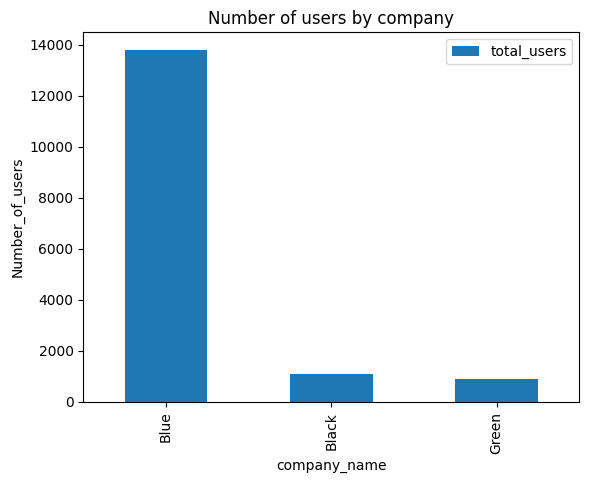

In [232]:
total_users_df.plot(kind = 'bar', x = 'company_name')

plt.title('Number of users by company')
plt.ylabel('Number_of_users')

plt.show();

In [233]:
total_users_df.loc[-1] = ['Red', np.nan]
total_users_df.index += 1
total_users_df

,company_name,total_users
2,Blue,13798.0
1,Black,1084.0
3,Green,889.0
0,Red,NaN


Для компании 'Red' зададим значение NaN. Вернемся к ней немного позже

In [234]:
print(df.columns)
df.head()

Index(['HID', 'active_Red', 'has_Green_id', 'has_Black_id', 'has_Blue_id',
       'Blue_activity_count', 'Blue_gmv_total', 'Green_gvm_total',
       'Green_gvm_order_count', 'Black_gvm_total', 'Black_gvm_order_count',
       'Red_android', 'Green_android', 'Black_android', 'Blue_android',
       'Red_apple', 'Green_apple', 'Black_apple', 'Blue_apple', 'is_msk',
       'Red_web', 'Green_web', 'Black_web', 'Blue_web'],
      dtype='object')


,HID,active_Red,has_Green_id,has_Black_id,has_Blue_id,Blue_activity_count,Blue_gmv_total,Green_gvm_total,Green_gvm_order_count,Black_gvm_total,...,Blue_android,Red_apple,Green_apple,Black_apple,Blue_apple,is_msk,Red_web,Green_web,Black_web,Blue_web
0,00003c7fb5e57ce673f1801f3679f5c25,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00006b602533083e3bebfcbff08613931,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0000736c3f76339196cb1cc759b8363b,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00009bdcc5307b38efde8690b8bd658e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0000bc3186b7b31d9b35d3fbbb250b9f8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Далее рассчитаем суммарный GMV по каждой из компаний

In [235]:
total_gmv_df = df[['Blue_gmv_total', 'Black_gvm_total', 'Green_gvm_total']].rename(
    columns = {
        'Blue_gmv_total': 'Blue',
        'Black_gvm_total': 'Black',
        'Green_gvm_total': 'Green'
    }
).sum().to_frame() \
.reset_index() \
.rename(
    columns = {
        'index': 'company_name',
        0: 'total_gmv',
    }
)

total_gmv_df

,company_name,total_gmv
0,Blue,246114.0
1,Black,9487308.0
2,Green,5992600.0


Также визуализируем полученные данные

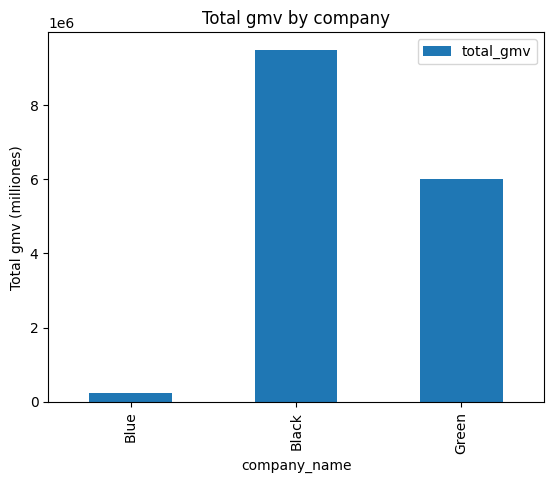

In [236]:
total_gmv_df.plot(kind = 'bar', x = 'company_name')

plt.title('Total gmv by company')
plt.ylabel('Total gmv (milliones)')

plt.show();

Несмотря на то, что количество пользователей компании 'Blue' значительно больше чем у 'Black' и 'Green', суммарный показатель GMV оказался намного меньше, чем у конкурентов.

Также предлагаю рассчитать и среднее значение (учитываем лишь платящих пользователей).

In [237]:
# mean_gmv_df = df[['Blue_gmv_total', 'Black_gvm_total', 'Green_gvm_total']].mean().to_frame() \
# .reset_index() \
# .rename(
#     columns = {
#         'Blue_gmv_total': 'Blue',
#         'Black_gvm_total': 'Black',
#         'Green_gvm_total': 'Green',
#         'index': 'company_name',
#         0: 'mean_gmv'
#     }
# )

mean_gmv_df = pd.DataFrame({
    'company_name': [
        'Blue', 'Black', 'Green'
    ],
    'mean_gmv': [ 
        df['Blue_gmv_total'].sum() / df[df['Blue_gmv_total'] != 0].shape[0],
        df['Black_gvm_total'].sum() / df[df['Black_gvm_total'] != 0].shape[0],
        df['Green_gvm_total'].sum() / df[df['Green_gvm_total'] != 0].shape[0],
    ]
})

mean_gmv_df

,company_name,mean_gmv
0,Blue,545.707317
1,Black,8792.685820
2,Green,6771.299435


Видим картину схожую с суммарным GMV.

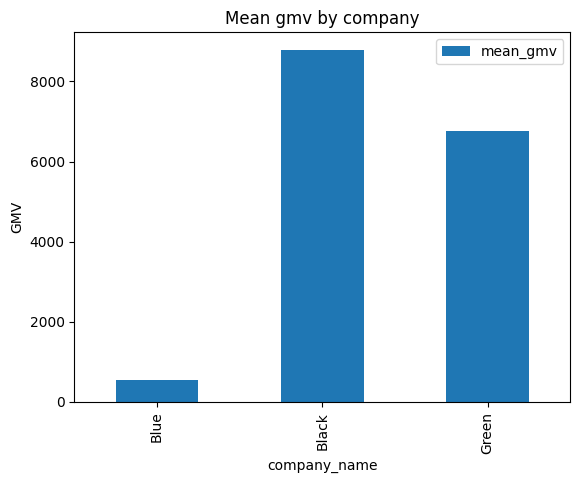

In [238]:
mean_gmv_df.plot(kind = 'bar', x = 'company_name')

plt.title('Mean gmv by company')
plt.ylabel('GMV')

plt.show();

По ходу рассчета необходимых показателей, будет записывать результаты в единый датасет, для более удобного восприятия. Он же нам понадобится позже для некоторых визуализаций.

In [239]:
gmv_df = total_gmv_df.merge(mean_gmv_df, how = 'inner', on = 'company_name')
gmv_df

,company_name,total_gmv,mean_gmv
0,Blue,246114.0,545.707317
1,Black,9487308.0,8792.685820
2,Green,5992600.0,6771.299435


In [240]:
gmv_df.loc[-1] = ['Red', np.nan, np.nan]
gmv_df.index = gmv_df.index + 1
gmv_df = gmv_df.sort_index().merge(total_users_df, how = 'inner', on = 'company_name')
gmv_df

,company_name,total_gmv,mean_gmv,total_users
0,Red,NaN,NaN,NaN
1,Blue,246114.0,545.707317,13798.0
2,Black,9487308.0,8792.685820,1084.0
3,Green,5992600.0,6771.299435,889.0


In [241]:
df[['Black_gvm_order_count', 'Green_gvm_order_count']].sum()

Series([], dtype: float64)

In [242]:
df['Green_gvm_order_count'].unique()

array(['0.0', '2.0', '26.0', '5.0', '37.0', '3.0', '12.0', '7.0', '1.0',
       '6.0', '8.0', datetime.datetime(2019, 5, 4, 0, 0), '4.0', '40.0',
       '9.0', '22.0', '14.0', '15.0', '85.0', '25.0', '10.0', '20.0',
       '18.0', '11.0', '31.0', '23.0', '39.0', '13.0', '42.0', '127.0',
       '28.0', '101.0', '32.0', '30.0', '27.0', '51.0', '83.0', '36.0',
       '16.0', '64.0', '19.0', '29.0', '24.0', '52.0', '82.0', '45.0',
       '50.0', '62.0', '49.0', '21.0', '56.0', '65.0', '100.0', '76.0',
       '88.0', '17.0', '69.0', '114.0', '35.0', '125.0', '38.0', '108.0',
       '168.0', '84.0', '63.0', '75.0', '34.0', '78.0', '43.0', '60.0',
       datetime.datetime(2019, 5, 2, 0, 0)], dtype=object)

In [243]:
df['Black_gvm_order_count'].unique()

array(['0.0', '1.0', '4.0', '2.0', '3.0', '5.0', '8.0', '25.0', '7.0',
       '27.0', '6.0', '15.0', '9.0', '10.0', '50.0', '22.0', '13.0',
       '12.0', '14.0', '16.0', '20.0', '26.0', '11.0', '18.0', '21.0',
       datetime.datetime(2019, 5, 2, 0, 0), '19.0', '37.0', '33.0',
       '17.0', '35.0', '29.0', '51.0', '23.0', '42.0', '60.0', '34.0',
       '36.0', datetime.datetime(2019, 5, 6, 0, 0)], dtype=object)

Видим, что колонки с количеством успешных заказов, помимо численных значений, содержат и нежелательные. Избавимся от них

In [244]:
# df_gvm = df[['Black_gvm_order_count', 'Green_gvm_order_count']]
# df_gvm

In [245]:
df['Black_gvm_order_count'] = pd.to_numeric(df['Black_gvm_order_count'], errors = 'coerce')
df['Green_gvm_order_count'] = pd.to_numeric(df['Green_gvm_order_count'], errors = 'coerce')
df.dtypes

HID                       object
active_Red               float64
has_Green_id             float64
has_Black_id             float64
has_Blue_id              float64
Blue_activity_count       object
Blue_gmv_total           float64
Green_gvm_total          float64
Green_gvm_order_count    float64
Black_gvm_total          float64
Black_gvm_order_count    float64
Red_android              float64
Green_android            float64
Black_android            float64
Blue_android             float64
Red_apple                float64
Green_apple              float64
Black_apple              float64
Blue_apple               float64
is_msk                   float64
Red_web                  float64
Green_web                float64
Black_web                float64
Blue_web                 float64
dtype: object

In [246]:
df['Black_gvm_order_count'].unique(), df['Green_gvm_order_count'].unique()

(array([ 0.,  1.,  4.,  2.,  3.,  5.,  8., 25.,  7., 27.,  6., 15.,  9.,
        10., 50., 22., 13., 12., 14., 16., 20., 26., 11., 18., 21., nan,
        19., 37., 33., 17., 35., 29., 51., 23., 42., 60., 34., 36.]),
 array([  0.,   2.,  26.,   5.,  37.,   3.,  12.,   7.,   1.,   6.,   8.,
         nan,   4.,  40.,   9.,  22.,  14.,  15.,  85.,  25.,  10.,  20.,
         18.,  11.,  31.,  23.,  39.,  13.,  42., 127.,  28., 101.,  32.,
         30.,  27.,  51.,  83.,  36.,  16.,  64.,  19.,  29.,  24.,  52.,
         82.,  45.,  50.,  62.,  49.,  21.,  56.,  65., 100.,  76.,  88.,
         17.,  69., 114.,  35., 125.,  38., 108., 168.,  84.,  63.,  75.,
         34.,  78.,  43.,  60.]))

Другое дело. Также стоит отметить, что в этот раз требуемый показатель приведен лишь для двух компаний. Помимо общего количества успешных заказов, рассчитаем и средний (также по плятащим пользователям).

In [247]:
gvm_df = df[['Black_gvm_order_count', 'Green_gvm_order_count']].rename(columns = {'Black_gvm_order_count': 'Black', 'Green_gvm_order_count': 'Green'}) \
.sum().to_frame().reset_index().rename(
    columns = {
        'index': 'company_name',
        0: 'total_gvm'
    }
)

gvm_df

,company_name,total_gvm
0,Black,4385.0
1,Green,7698.0


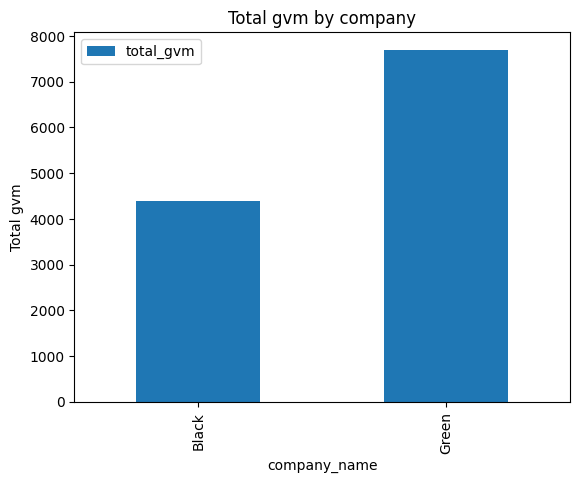

In [248]:
gvm_df.plot(kind = 'bar', x = 'company_name')    

plt.title('Total gvm by company')
plt.ylabel('Total gvm')
plt.show()

In [249]:
mean_gvm = pd.DataFrame({
    'company_name': ['Black', 'Green'],
    'mean_gvm': [
        df['Black_gvm_order_count'].sum() / df[df['Black_gvm_order_count'] != 0].shape[0],
        df['Green_gvm_order_count'].sum() / df[df['Green_gvm_order_count'] != 0].shape[0]
    ]
})

mean_gvm

,company_name,mean_gvm
0,Black,4.063948
1,Green,8.698305


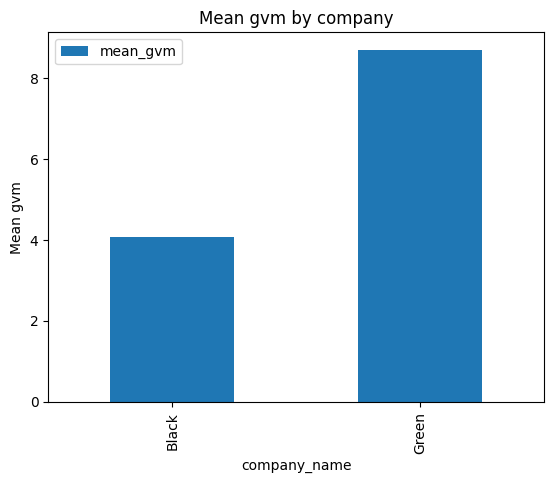

In [250]:
mean_gvm.plot(kind = 'bar', x = 'company_name')    

plt.title('Mean gvm by company')
plt.ylabel('Mean gvm')
plt.show()

In [251]:
gvm_df = gvm_df.merge(mean_gvm, how = 'inner', on = 'company_name')
gvm_df

,company_name,total_gvm,mean_gvm
0,Black,4385.0,4.063948
1,Green,7698.0,8.698305


Видим что суммарный и усредненный показатель GVM больше у компании 'Green'. Добавим рассчеты в наш датасет.

In [252]:
gvm_df.loc[-1] = ['Red', np.nan, np.nan]
gvm_df.loc[-2] = ['Blue', np.nan, np.nan]
gvm_df.index += 2

gmv_df = gmv_df.merge(gvm_df, how = 'inner', on = 'company_name')
gmv_df

,company_name,total_gmv,mean_gmv,total_users,total_gvm,mean_gvm
0,Red,NaN,NaN,NaN,NaN,NaN
1,Blue,246114.0,545.707317,13798.0,NaN,NaN
2,Black,9487308.0,8792.685820,1084.0,4385.0,4.063948
3,Green,5992600.0,6771.299435,889.0,7698.0,8.698305


In [253]:
df.columns

Index(['HID', 'active_Red', 'has_Green_id', 'has_Black_id', 'has_Blue_id',
       'Blue_activity_count', 'Blue_gmv_total', 'Green_gvm_total',
       'Green_gvm_order_count', 'Black_gvm_total', 'Black_gvm_order_count',
       'Red_android', 'Green_android', 'Black_android', 'Blue_android',
       'Red_apple', 'Green_apple', 'Black_apple', 'Blue_apple', 'is_msk',
       'Red_web', 'Green_web', 'Black_web', 'Blue_web'],
      dtype='object')

Избавляемся от ненужных значений и для колонки с количеством активных действий пользователя. Здесь и вовсе приведены данные по одной компании (Blue). Обидно(

In [254]:
df['Blue_activity_count'] = pd.to_numeric(df['Blue_activity_count'], errors = 'coerce')
df['Blue_activity_count'].sum()

21004.0

Получаем следующий результат. Значение всего одно, так что от визуализации будет мало толку.

In [255]:
activity_count_df = pd.DataFrame({
    'company_name': ['Red', 'Blue', 'Black', 'Green'],
    'activity_count': [np.nan, df['Blue_activity_count'].sum(), np.nan, np.nan]
})

activity_count_df

,company_name,activity_count
0,Red,NaN
1,Blue,21004.0
2,Black,NaN
3,Green,NaN


Также добавляем это значение.

In [256]:
gmv_df = gmv_df.merge(activity_count_df, how = 'inner', on = 'company_name')
gmv_df

,company_name,total_gmv,mean_gmv,total_users,total_gvm,mean_gvm,activity_count
0,Red,NaN,NaN,NaN,NaN,NaN,NaN
1,Blue,246114.0,545.707317,13798.0,NaN,NaN,21004.0
2,Black,9487308.0,8792.685820,1084.0,4385.0,4.063948,NaN
3,Green,5992600.0,6771.299435,889.0,7698.0,8.698305,NaN


Теперь узнаем какими устройствами пользуются клиенты. Начем с пользователей android. И наконец-то имеем данные по всем компаниям.

In [257]:
android_df = df[['Red_android', 'Blue_android', 'Black_android', 'Green_android']].rename(columns = {
    'Red_android': 'Red',
    'Blue_android': 'Blue',
    'Black_android': 'Black',
    'Green_android': 'Green'
}).sum().reset_index().rename(
    columns = {
        'index': 'company_name',
        0: 'android_users'
    }
)

android_df

,company_name,android_users
0,Red,32133.0
1,Blue,8047.0
2,Black,1077.0
3,Green,546.0


Ого! Получается что наибольшее число клиентов все же у компании 'Red'. И это только после подсчета пользователей android. 

Визуализируем данные и добавляем в наш датасет.

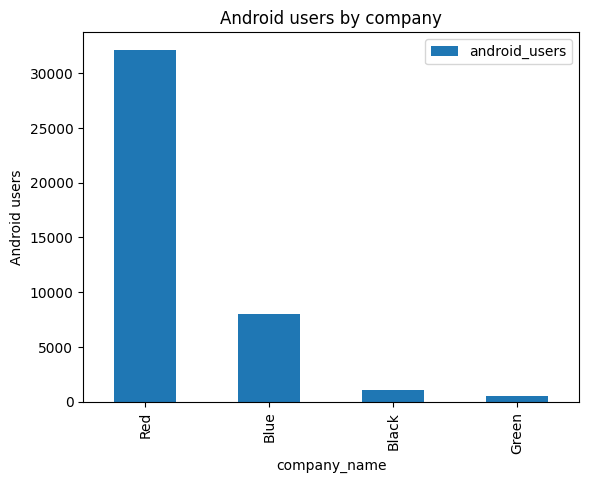

In [258]:
android_df.plot(kind = 'bar', x = 'company_name')

plt.title('Android users by company')
plt.ylabel('Android users')
plt.show()

In [259]:
gmv_df = gmv_df.merge(android_df, how = 'inner', on = 'company_name')
gmv_df

,company_name,total_gmv,mean_gmv,total_users,total_gvm,mean_gvm,activity_count,android_users
0,Red,NaN,NaN,NaN,NaN,NaN,NaN,32133.0
1,Blue,246114.0,545.707317,13798.0,NaN,NaN,21004.0,8047.0
2,Black,9487308.0,8792.685820,1084.0,4385.0,4.063948,NaN,1077.0
3,Green,5992600.0,6771.299435,889.0,7698.0,8.698305,NaN,546.0


Далее перейдем к пользователям apple.

In [260]:
apple_df = df[['Red_apple', 'Blue_apple', 'Black_apple', 'Green_apple']].rename(columns = {
    'Red_apple': 'Red',
    'Blue_apple': 'Blue',
    'Black_apple': 'Black',
    'Green_apple': 'Green'
}).sum().reset_index().rename(
    columns = {
        'index': 'company_name',
        0: 'apple_users'
    }
)

apple_df

,company_name,apple_users
0,Red,10874.0
1,Blue,4646.0
2,Black,1782.0
3,Green,616.0


Если сравнивать компании 'Red' и 'Blue', то разница в пользователях не такая большая по сравнению с android. Для двух других компаний 'яблочники' и вовсе составляют большую часть аудитории.

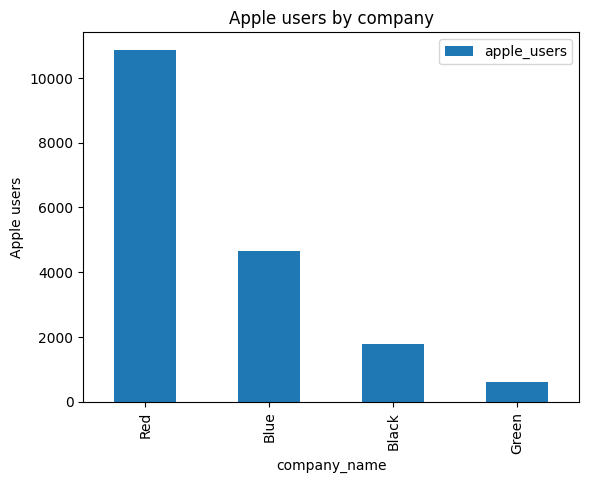

In [261]:
apple_df.plot(kind = 'bar', x = 'company_name')

plt.title('Apple users by company')
plt.ylabel('Apple users')
plt.show()

In [262]:
gmv_df = gmv_df.merge(apple_df, how = 'inner', on = 'company_name')
gmv_df

,company_name,total_gmv,mean_gmv,total_users,total_gvm,mean_gvm,activity_count,android_users,apple_users
0,Red,NaN,NaN,NaN,NaN,NaN,NaN,32133.0,10874.0
1,Blue,246114.0,545.707317,13798.0,NaN,NaN,21004.0,8047.0,4646.0
2,Black,9487308.0,8792.685820,1084.0,4385.0,4.063948,NaN,1077.0,1782.0
3,Green,5992600.0,6771.299435,889.0,7698.0,8.698305,NaN,546.0,616.0


Осталось разобраться с пользователями ПК.

In [263]:
web_df = df[['Red_web', 'Blue_web', 'Black_web', 'Green_web']].rename(columns = {
    'Red_web': 'Red',
    'Blue_web': 'Blue',
    'Black_web': 'Black',
    'Green_web': 'Green'
}).sum().reset_index().rename(
    columns = {
        'index': 'company_name',
        0: 'web_users'
    }
)

web_df

,company_name,web_users
0,Red,67108.0
1,Blue,10640.0
2,Black,1461.0
3,Green,198.0


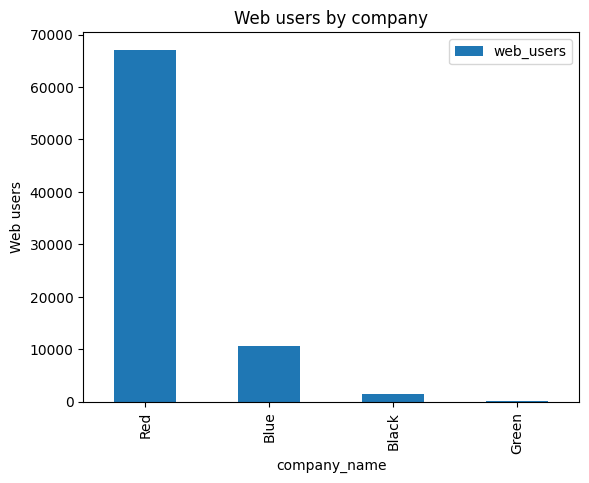

In [264]:
web_df.plot(kind = 'bar', x = 'company_name')

plt.title('Web users by company')
plt.ylabel('Web users')
plt.show()

И вновь отличилась компания 'Red'. Число пк-шников в этой компании значительно больше других. Запишем полученные данные.

In [265]:
gmv_df = gmv_df.merge(web_df, how = 'inner', on = 'company_name')
gmv_df

,company_name,total_gmv,mean_gmv,total_users,total_gvm,mean_gvm,activity_count,android_users,apple_users,web_users
0,Red,NaN,NaN,NaN,NaN,NaN,NaN,32133.0,10874.0,67108.0
1,Blue,246114.0,545.707317,13798.0,NaN,NaN,21004.0,8047.0,4646.0,10640.0
2,Black,9487308.0,8792.685820,1084.0,4385.0,4.063948,NaN,1077.0,1782.0,1461.0
3,Green,5992600.0,6771.299435,889.0,7698.0,8.698305,NaN,546.0,616.0,198.0


In [266]:
df.columns

Index(['HID', 'active_Red', 'has_Green_id', 'has_Black_id', 'has_Blue_id',
       'Blue_activity_count', 'Blue_gmv_total', 'Green_gvm_total',
       'Green_gvm_order_count', 'Black_gvm_total', 'Black_gvm_order_count',
       'Red_android', 'Green_android', 'Black_android', 'Blue_android',
       'Red_apple', 'Green_apple', 'Black_apple', 'Blue_apple', 'is_msk',
       'Red_web', 'Green_web', 'Black_web', 'Blue_web'],
      dtype='object')

А сколько среди клиентов Москвичей? Сейчас узнаем.

In [267]:
df['is_msk'].sum() / df['is_msk'].shape[0]

0.11920119201192012

In [268]:
msk_users_by_company = [
    np.nan,
    df[(df['is_msk'] == 1.0) & (df['has_Blue_id'] == 1.0)].shape[0],
    df[(df['is_msk'] == 1.0) & (df['has_Black_id'] == 1.0)].shape[0],
    df[(df['is_msk'] == 1.0) & (df['has_Green_id'] == 1.0)].shape[0]
]

gmv_df['Msk_users'] = msk_users_by_company
gmv_df

,company_name,total_gmv,mean_gmv,total_users,total_gvm,mean_gvm,activity_count,android_users,apple_users,web_users,Msk_users
0,Red,NaN,NaN,NaN,NaN,NaN,NaN,32133.0,10874.0,67108.0,NaN
1,Blue,246114.0,545.707317,13798.0,NaN,NaN,21004.0,8047.0,4646.0,10640.0,2033.0
2,Black,9487308.0,8792.685820,1084.0,4385.0,4.063948,NaN,1077.0,1782.0,1461.0,388.0
3,Green,5992600.0,6771.299435,889.0,7698.0,8.698305,NaN,546.0,616.0,198.0,674.0


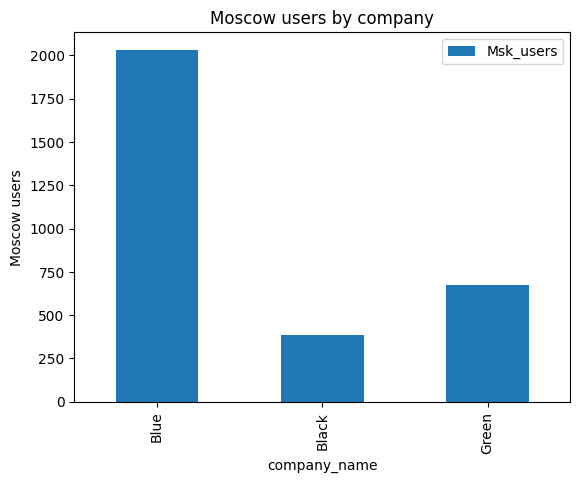

In [269]:
gmv_df[['company_name', 'Msk_users']][1:].plot(kind = 'bar', x = 'company_name')

plt.title('Moscow users by company')
plt.ylabel('Moscow users')
plt.show()

Видно, что большая часть пользователей компании 'Green' из Москвы. Возможно этим и обосновываются высокие показатели GMV. С другими компаниями ситуация немного сложнее, вернемся к ним с более подходящей визулизацией.

In [270]:
df.sum().to_frame()

,0
HID,00003c7fb5e57ce673f1801f3679f5c2500006b6025330...
active_Red,55874.0
has_Green_id,889.0
has_Black_id,1084.0
has_Blue_id,13798.0
Blue_activity_count,21004.0
Blue_gmv_total,246114.0
Green_gvm_total,5992600.0
Green_gvm_order_count,7698.0
Black_gvm_total,9487308.0


Непонятно почему, но мы видим некоторые несоответствие для пользователей компании Black. Одних лишь пользователей apple больше количества зарегистрированных клиентов. Хочется верить, что нигде не ошибся. Судя по всему, наличие приложения на устройстве еще не означает наличие аккаунта. Будем знать

In [271]:
df['has_Black_id'].unique(), df['active_Red'].unique(), df['Blue_activity_count'].unique()

(array([0., 1., 2.]),
 array([0., 1.]),
 array([  2.,   0.,   1.,  17.,  13.,   5.,   6.,  26.,   8.,   4.,  27.,
         19.,  12.,   9.,   3.,  20.,  10.,  23.,   7.,  16.,  14.,  15.,
         53.,  nan,  32.,  11.,  18.,  24., 119.,  49.,  39.,  21.,  35.,
         72.,  30.,  71.,  28.,  42.,  34.,  41.,  22.,  29.,  36.,  90.,
         40.,  43.,  51.,  44.,  25.,  31.,  45.,  67.,  33., 101.,  74.,
         46., 111.,  66.,  38.,  63., 100., 237.,  59.,  37.,  47.]))

Визуализируем данные об устройствах клиентов

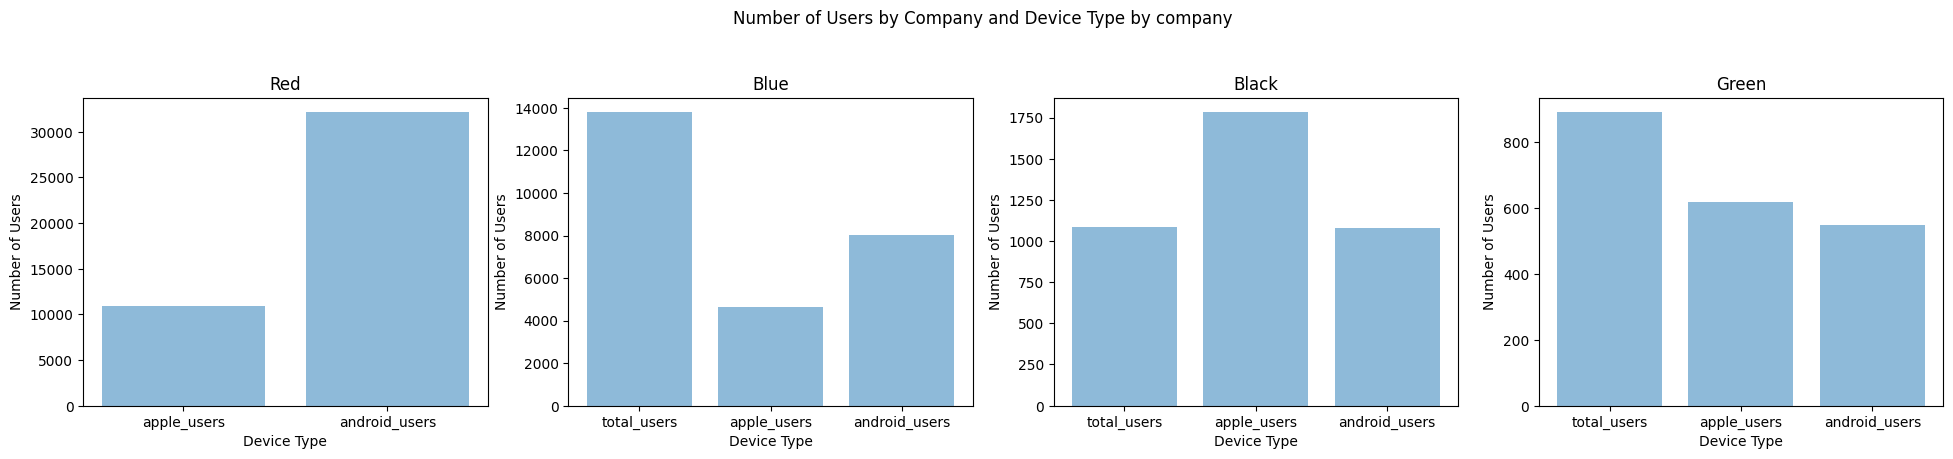

In [272]:
fig, axs = plt.subplots(1, 4, figsize=(24, 4))
columns = ['total_users', 'apple_users', 'android_users']
for i, row in gmv_df[['company_name', 'total_users', 'apple_users', 'android_users']].iterrows():
    try:
        axs[i].bar(columns, [row[c] for c in columns], alpha=0.5)
        axs[i].set_title(row['company_name'])
    except IndexError:
        pass

fig.suptitle('Number of Users by Company and Device Type by company', y = 1.1)
for ax in axs:
    ax.set_xlabel('Device Type')
    ax.set_ylabel('Number of Users')

plt.show()

In [273]:
df.columns

Index(['HID', 'active_Red', 'has_Green_id', 'has_Black_id', 'has_Blue_id',
       'Blue_activity_count', 'Blue_gmv_total', 'Green_gvm_total',
       'Green_gvm_order_count', 'Black_gvm_total', 'Black_gvm_order_count',
       'Red_android', 'Green_android', 'Black_android', 'Blue_android',
       'Red_apple', 'Green_apple', 'Black_apple', 'Blue_apple', 'is_msk',
       'Red_web', 'Green_web', 'Black_web', 'Blue_web'],
      dtype='object')

Тут замечаем, что можно удачно рассчитать количество Москвичей среди пользователей компании 'Red' + общее количество пользователей. Исключим наличие аккаунтов других компаний + добавим условие территориального расположения в столице. Стоит понимать, что это лишь минимальное потенциальное значение, так как целевые пользователи могут имееть профили и в других компаниях.

In [274]:
df[(df['has_Green_id'] == 0) & (df['has_Black_id'] == 0) & (df['has_Blue_id'] == 0)]

,HID,active_Red,has_Green_id,has_Black_id,has_Blue_id,Blue_activity_count,Blue_gmv_total,Green_gvm_total,Green_gvm_order_count,Black_gvm_total,...,Blue_android,Red_apple,Green_apple,Black_apple,Blue_apple,is_msk,Red_web,Green_web,Black_web,Blue_web
1,00006b602533083e3bebfcbff08613931,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0000736c3f76339196cb1cc759b8363b,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00009bdcc5307b38efde8690b8bd658e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0000bc3186b7b31d9b35d3fbbb250b9f8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0000c3f7c3075b31690f03025176c601b,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,32555ec33d762588db3253b063525f03b58f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
99996,3255600b525b2598b37775fb3b25b3397bbb,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
99997,325563dbbb35c393be38c5c79373ed180,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,3255650825570bcc93bc9b076b0bfbb25e6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [275]:
potential_total_Red_users = df[(df['has_Green_id'] == 0) & (df['has_Black_id'] == 0) & (df['has_Blue_id'] == 0)].shape[0]
potential_total_Red_users

85305

In [276]:
gmv_df['total_users'] = gmv_df['total_users'].fillna(value = potential_total_Red_users)
gmv_df

,company_name,total_gmv,mean_gmv,total_users,total_gvm,mean_gvm,activity_count,android_users,apple_users,web_users,Msk_users
0,Red,NaN,NaN,85305.0,NaN,NaN,NaN,32133.0,10874.0,67108.0,NaN
1,Blue,246114.0,545.707317,13798.0,NaN,NaN,21004.0,8047.0,4646.0,10640.0,2033.0
2,Black,9487308.0,8792.685820,1084.0,4385.0,4.063948,NaN,1077.0,1782.0,1461.0,388.0
3,Green,5992600.0,6771.299435,889.0,7698.0,8.698305,NaN,546.0,616.0,198.0,674.0


In [277]:
potential_Red_msk_users = df[(df['has_Green_id'] == 0) & (df['has_Black_id'] == 0) & (df['has_Blue_id'] == 0) & (df['is_msk'])].shape[0]
gmv_df['Msk_users'] = gmv_df['Msk_users'].fillna(value = potential_Red_msk_users)
gmv_df

,company_name,total_gmv,mean_gmv,total_users,total_gvm,mean_gvm,activity_count,android_users,apple_users,web_users,Msk_users
0,Red,NaN,NaN,85305.0,NaN,NaN,NaN,32133.0,10874.0,67108.0,9037.0
1,Blue,246114.0,545.707317,13798.0,NaN,NaN,21004.0,8047.0,4646.0,10640.0,2033.0
2,Black,9487308.0,8792.685820,1084.0,4385.0,4.063948,NaN,1077.0,1782.0,1461.0,388.0
3,Green,5992600.0,6771.299435,889.0,7698.0,8.698305,NaN,546.0,616.0,198.0,674.0


In [278]:
gmv_df

,company_name,total_gmv,mean_gmv,total_users,total_gvm,mean_gvm,activity_count,android_users,apple_users,web_users,Msk_users
0,Red,NaN,NaN,85305.0,NaN,NaN,NaN,32133.0,10874.0,67108.0,9037.0
1,Blue,246114.0,545.707317,13798.0,NaN,NaN,21004.0,8047.0,4646.0,10640.0,2033.0
2,Black,9487308.0,8792.685820,1084.0,4385.0,4.063948,NaN,1077.0,1782.0,1461.0,388.0
3,Green,5992600.0,6771.299435,889.0,7698.0,8.698305,NaN,546.0,616.0,198.0,674.0


Теперь рассчитаем долю пользователей с разным устройствами, а также москвичей от общего количества клиентов соответсвующей компании.

In [279]:
gmv_df['apple_users_share'] = gmv_df['apple_users'] / gmv_df['total_users']
gmv_df['android_users_share'] = gmv_df['android_users'] / gmv_df['total_users']
gmv_df['web_users_share'] = gmv_df['web_users'] / gmv_df['total_users']
gmv_df['msk_users_share'] = gmv_df['Msk_users'] / gmv_df['total_users']
gmv_df

,company_name,total_gmv,mean_gmv,total_users,total_gvm,mean_gvm,activity_count,android_users,apple_users,web_users,Msk_users,apple_users_share,android_users_share,web_users_share,msk_users_share
0,Red,NaN,NaN,85305.0,NaN,NaN,NaN,32133.0,10874.0,67108.0,9037.0,0.127472,0.376684,0.786683,0.105938
1,Blue,246114.0,545.707317,13798.0,NaN,NaN,21004.0,8047.0,4646.0,10640.0,2033.0,0.336715,0.583200,0.771126,0.147340
2,Black,9487308.0,8792.685820,1084.0,4385.0,4.063948,NaN,1077.0,1782.0,1461.0,388.0,1.643911,0.993542,1.347786,0.357934
3,Green,5992600.0,6771.299435,889.0,7698.0,8.698305,NaN,546.0,616.0,198.0,674.0,0.692913,0.614173,0.222722,0.758155


Визуализируем данные о количестве пользователей с разными устройствами (учитывая оценку количества клиентов 'Red')

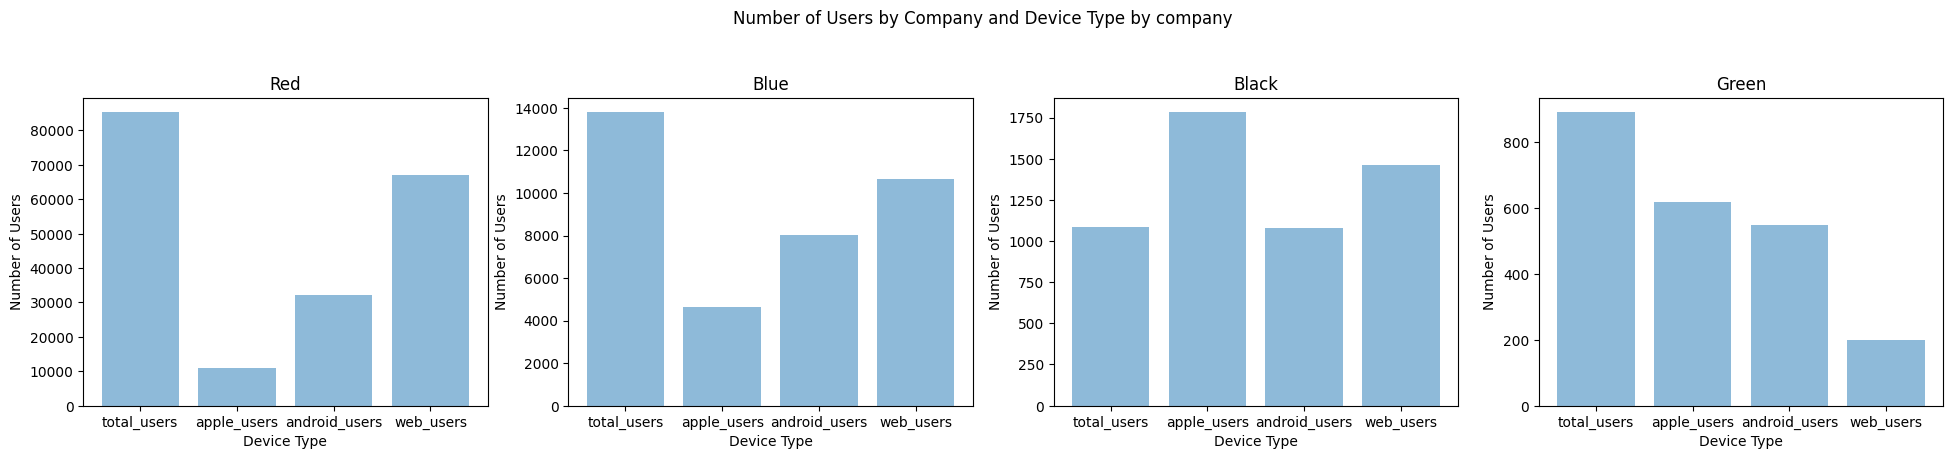

In [280]:
fig, axs = plt.subplots(1, len(gmv_df), figsize=(24, 4))
columns = ['total_users', 'apple_users', 'android_users', 'web_users']
for i, row in gmv_df[['company_name', 'total_users', 'apple_users', 'android_users', 'web_users']].iterrows():
    try:
        axs[i].bar(columns, [row[c] for c in columns], alpha=0.5)
        axs[i].set_title(row['company_name'])
    except IndexError:
        pass

fig.suptitle('Number of Users by Company and Device Type by company', y = 1.1)
for ax in axs:
    ax.set_xlabel('Device Type')
    ax.set_ylabel('Number of Users')

plt.show()

Теперь для их долю от общей аудитории.

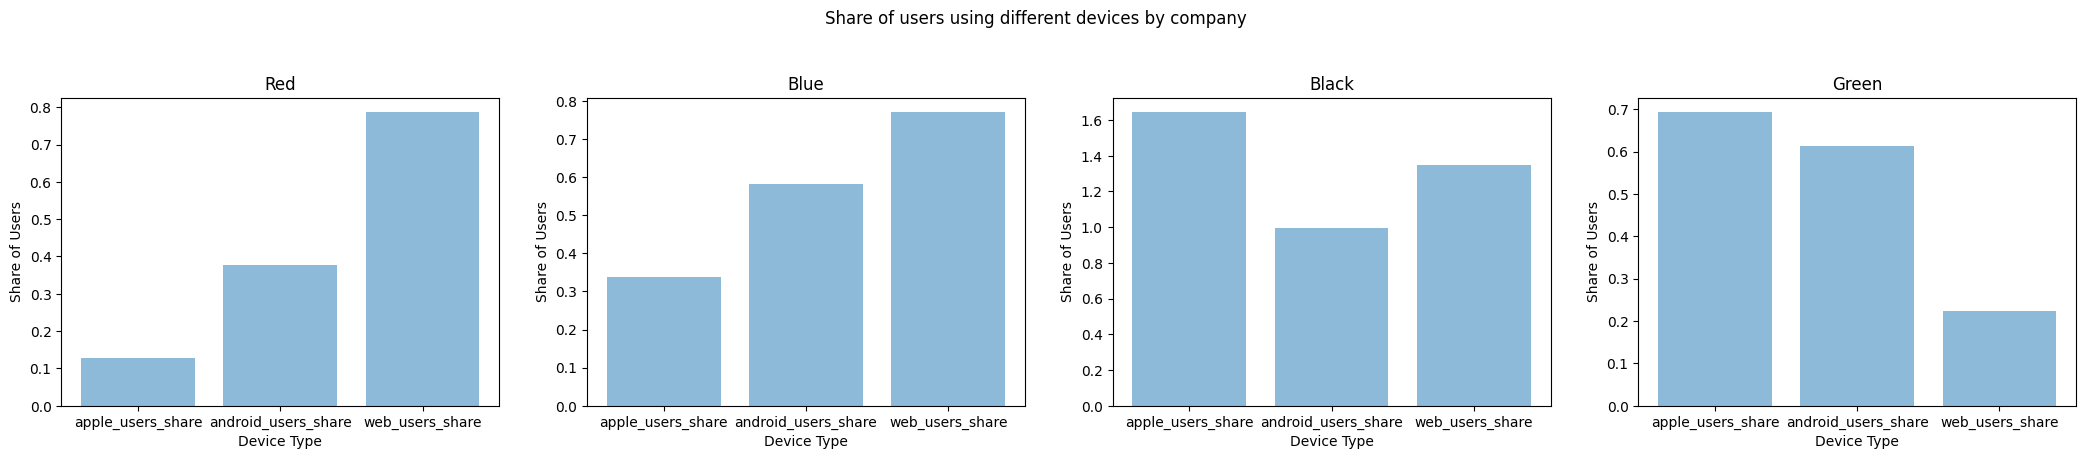

In [281]:
fig, axs = plt.subplots(1, len(gmv_df), figsize=(26, 4))
columns = ['apple_users_share', 'android_users_share', 'web_users_share']
for i, row in gmv_df[['company_name', 'apple_users_share', 'android_users_share', 'web_users_share']].iterrows():
    try:
        axs[i].bar(columns, [row[c] for c in columns], alpha=0.5)
        axs[i].set_title(row['company_name'])
    except IndexError:
        pass

fig.suptitle('Share of users using different devices by company', y = 1.1)
for ax in axs:
    ax.set_xlabel('Device Type')
    ax.set_ylabel('Share of Users')

plt.show()

И наконец узнаем так ли много Москвичей в компаниях, со сравнению с общим количеством их клиентов

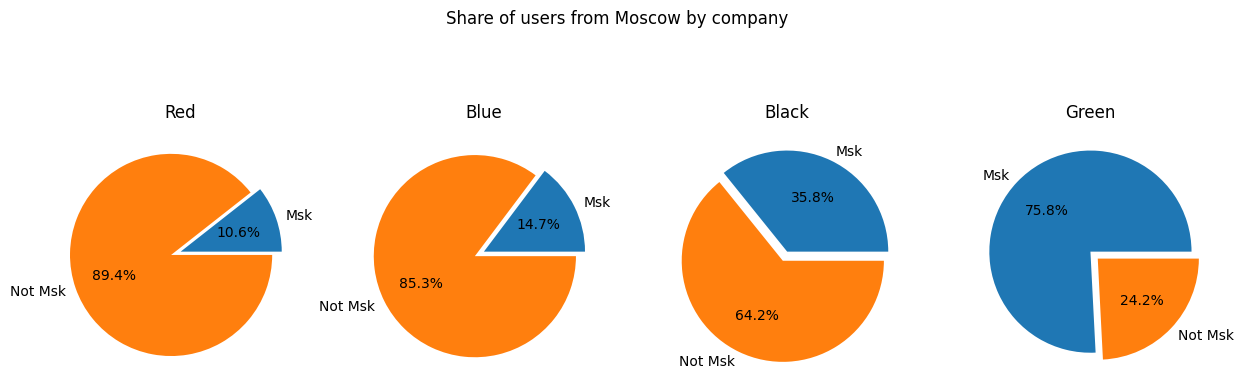

In [282]:
fig, axis = plt.subplots(1, len(gmv_df), figsize = (15, 5))

for i, row in gmv_df[['company_name', 'total_users', 'Msk_users']].iterrows():
    total_users = row['total_users']
    msk_users = row['Msk_users']
    msk_users_share = msk_users / total_users

    axis[i].pie([msk_users_share, 1 - msk_users_share], labels = ['Msk', 'Not Msk'], explode=[0,0.1], autopct='%1.1f%%') 
    axis[i].set_title(row['company_name'])

fig.suptitle('Share of users from Moscow by company')

plt.show()

Как и предполагалось. Клиенты 'Green' в большинстве своем из Москвы, отсюда и высокие показатели GMV и платежеспособность. Москвичей из 'Black' также немало, а вот с команиями 'Red' и 'Blue' ситуация обратная (всего 10.6 и 14.7 процентов соответственно), а значит (в теории) и меньшие показатели выручки.

Также стоит помнить, что в качетве количества клиентов компании 'Red' была взята минимальная оценка + данных для рассчета некоторых из показателей оказалось недостаточно, либо их вовсе не оказалось в датасете.

In [ ]:
gmv_df

,company_name,total_gmv,mean_gmv,total_users,total_gvm,mean_gvm,activity_count,android_users,apple_users,web_users,Msk_users,apple_users_share,android_users_share,web_users_share,msk_users_share
0,Red,NaN,NaN,85305.0,NaN,NaN,NaN,32133.0,10874.0,67108.0,9037.0,0.127472,0.376684,0.786683,0.105938
1,Blue,246114.0,544.500000,13801.0,NaN,NaN,21008.0,8047.0,4646.0,10640.0,2033.0,0.336642,0.583074,0.770959,0.147308
2,Black,9487308.0,8792.685820,1084.0,4385.0,4.063948,NaN,1077.0,1782.0,1461.0,388.0,1.643911,0.993542,1.347786,0.357934
3,Green,5993420.0,6764.582393,890.0,7699.0,8.689616,NaN,546.0,616.0,198.0,675.0,0.692135,0.613483,0.222472,0.758427
